# Analysis 2
- Read all articles that were mailed, shared and viewed from most popular api
- Plucked the common articles that were emailed, shared and viewed
- Counted their categories
- Displayed top 10 categories and number of common articles in these categories
- Plotted a graph to show captured information visually

In [1]:
# Importing the required modules
import json
import os
import operator
import numpy as np # Used only for arranging y axis values on graph plotted
from matplotlib import pyplot as plt

In [2]:
emailed_list = []
shared_list = []
viewed_list = []

path_emailed = os.path.expanduser('~\\midterm\\data\\nyt\\mostpopular\\Emailed') # Creating a path to fetch most emailed data
path_shared = os.path.expanduser('~\\midterm\\data\\nyt\\mostpopular\\Shared') # Creating a path to fetch most shared data
path_viewed = os.path.expanduser('~\\midterm\\data\\nyt\\mostpopular\\Viewed') # Creating a path to fetch most viewed data

for subdir, dirs, files in os.walk(path_emailed): # Looping through each files present under directories and sub directories
    for file in files: # Looping through each found directories, subdirectories or files
        if(file[0] != '.'): # If selected file is a file and not a directory
            try: # Putting whole code in a try except block to catch unwanted errors
                received_response = open(os.path.join(subdir, file), 'r', errors = 'ignore') # Opening the file in read mode
                data = json.load(received_response) # Reading the file content 
    
                for y in data['results']: # Looping through each data section in opened file
                    # Storing the article title, its section and published date
                    emailed_list.append([y['title'], y['section'], y['published_date']]) 
                
            except:
                pass
            
for subdir, dirs, files in os.walk(path_shared): # Looping through each files present under directories and sub directories
    for file in files: # Looping through each found directories, subdirectories or files
        if(file[0] != '.'): # If selected file is a file and not a directory
            try: # Putting whole code in a try except block to catch unwanted errors
                received_response = open(os.path.join(subdir, file), 'r', errors = 'ignore') # Opening the file in read mode
                data = json.load(received_response) # Reading the file content
    
                for y in data['results']: # Looping through each data section in opened file
                    # Storing the article title and published date
                    shared_list.append([y['title'], y['published_date']])
                
            except:
                pass
            
for subdir, dirs, files in os.walk(path_viewed): # Looping through each files present under directories and sub directories
    for file in files: # Looping through each found directories, subdirectories or files
        if(file[0] != '.'): # If selected file is a file and not a directory
            try: # Putting whole code in a try except block to catch unwanted errors
                received_response = open(os.path.join(subdir, file), 'r', errors = 'ignore') # Opening the file in read mode
                data = json.load(received_response) # Reading the file content
    
                for y in data['results']: # Looping through each data section in opened file
                    # Storing the article title and published date
                    viewed_list.append([y['title'], y['published_date']])
                
            except:
                pass

In [3]:
list_compare1 = [] # Creating an empty list to store common articles in emailed and shared section

for x in emailed_list: #Looping through each article in emailed section
    for y in shared_list: #Looping through each article in shared section
        if x[0] == y[0]: # If both article matches then adding that article to a list
            list_compare1.append([x[0], x[1], x[2], y[1]])

In [4]:
list_compare2 = [] # Creating an empty list to store common articles in emailed, shared and viewed section

for x in list_compare1: #Looping through each article in emailed and shared section
    for y in viewed_list: #Looping through each article in viewed section
        if x[0] == y[0]: # If both article matches then adding that article to a list
            list_compare2.append([x[0], x[1], x[2], x[3], y[1]])
            

In [5]:
category_list = [x[1] for x in list_compare2] # Storing all common articles in a list
category_list_unique = set(x[1] for x in list_compare2) # Storing all unique common articles in a list
categ_dict = {} # Creating an empty dictionary to store common articles and their frequency
categ_count = 0 # Creating a count variable and assigning value 0 to it

for x in category_list_unique: # Looping through each unique common articles
    for y in category_list: # Looping through each common articles
        if x == y: # If both matches then incrementing the article count by 1
            categ_count = categ_count + 1
    categ_dict.update({x:categ_count}) # Updating the dictionary with article category and its frequency
    categ_count = 0 # Reassigning the temp count variable to 0 for outer for loop

In [6]:
# Sorting the dictionary in descending order of frequency
categ_dict_sorted = sorted(categ_dict.items(), key=operator.itemgetter(1), reverse = True)

# Displaying top 10 results
print(categ_dict_sorted[:10])

[('Travel', 9), ('Science', 8), ('Theater', 7), ('Education', 6), ('Food', 6), ('Arts', 5), ('Books', 5), ('Technology', 5), ('Sports', 5), ('Style', 2)]


In [7]:
y_values = [x[1] for x in categ_dict_sorted[:10]] # Storing top 10 frequencies to be used for y-axis
x_values = [y[0] for y in categ_dict_sorted[:10]] # Storing top 10 frequencies to be used for y-axis

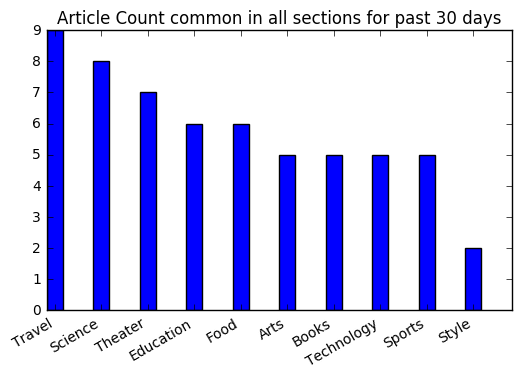

In [8]:
fig = plt.figure() # Calling the figure function from matplotlib module
ax = fig.add_subplot(111) # Creating a subplot
ax.set_title("Article Count common in all sections for past 30 days") # Setting up the title for plot

width = .35 # Setting the width between each element of histogram
ind = np.arange(len(y_values)) # Arranging the frequencies on y axis
plt.bar(ind, y_values, width=width) # Plotting the chart
plt.xticks(ind + width / 2, x_values) # Displaying the tick in the middle on x axis

fig.autofmt_xdate() # Formatting the x axis to make values readable

# Creating a path to store the created chart
save_path = os.path.expanduser('~\\midterm\\que2\\ana_2\\Article Count common.pdf')

plt.savefig(save_path) # Saving the chart to desired location

plt.show() # Displaying the chart